In [60]:
from utils.load_data import load_data
from utils.preprocessing import preprocess_data
import matplotlib.pyplot as plt
from models.BaseModel import BaseModel
from sklearn.model_selection import train_test_split
import pandas as pd

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
SEED = 0
EPS = 1e-6

In [62]:
data = load_data()
X, y, y_mean, y_std = preprocess_data(data=data, epsilon=EPS)

X

,Expense_average,Research_and_development_average,Capital_expenditure_average,Business_average,Cost_average,Tax_average,Financial_capital_average,Investment_average,Gross_domestic_product_average,Credit_average,...,Artificial_intelligence_average,International_Financial_Reporting_Standards_average,Employment_average,country_Canada,country_Germany,country_Japan,country_Korea,country_Switzerland,country_United Kingdom,country_United States
date,,,,,,,,,,,,,,,,,,,,,
2004-03-01,-1.060998,2.871241,-1.696290,1.582391,-0.732737,-0.290201,-0.604001,-0.078562,0.186376,-0.375353,...,-0.395035,-1.710910,1.689417,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
2004-06-01,-1.522179,2.666916,-1.696290,1.367863,-1.087844,-1.376563,-0.604001,-0.269472,-0.894918,-0.286636,...,-0.453614,-1.710910,1.689417,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
2004-09-01,-1.522179,2.799126,-1.696290,1.718909,-1.087844,-1.678330,-0.604001,-0.396745,-0.390314,-0.242277,...,-0.453614,-1.710910,1.614286,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
2004-12-01,-1.573422,0.719815,-1.696290,0.750281,-1.138574,-1.617977,-0.604001,-0.587654,0.042203,-0.552786,...,-0.395035,-1.710910,0.787848,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
2005-03-01,-0.958513,2.594801,0.031036,1.647399,-0.884926,0.071919,-0.237990,0.048711,0.258462,-0.419711,...,-0.453614,-1.710910,1.952374,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,1.808578,0.767892,2.520419,1.036319,2.361764,1.942876,-0.375244,1.385078,2.132705,1.221549,...,2.182437,-0.598496,-0.414243,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072
2023-06-01,0.117578,-0.073448,1.707559,0.516251,2.361764,-0.169494,-0.451496,0.557803,0.330548,1.265908,...,3.119700,-0.783898,-0.526940,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072
2023-09-01,1.347396,0.827987,2.063185,0.906302,2.057387,-0.169494,-0.451496,1.066895,2.348963,0.999757,...,3.119700,-0.459444,-0.564505,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072


In [63]:
y

date
2004-03-01   -1.110615
2004-06-01   -1.066959
2004-09-01   -1.025349
2004-12-01   -0.986653
2005-03-01   -0.943852
                ...   
2023-03-01    2.464404
2023-06-01    2.521690
2023-09-01    2.626594
2023-12-01    2.690385
2024-03-01    2.755538
Name: GDP, Length: 550, dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [65]:
model = BaseModel(seed=SEED)

model.fit(X_train, y_train)

VotingRegressor(estimators=[('model_0',
                             MLPRegressor(hidden_layer_sizes=(100, 20),
                                          random_state=0, solver='sgd')),
                            ('model_1',
                             MLPRegressor(hidden_layer_sizes=(100, 20),
                                          random_state=1, solver='sgd')),
                            ('model_2',
                             MLPRegressor(hidden_layer_sizes=(100, 20),
                                          random_state=2, solver='sgd')),
                            ('model_3',
                             MLPRegressor(hidden_layer_sizes=(100, 20),
                                          random_state=3, solver='sgd')),
                            ('model_4',
                             MLPRegressor(hidden_layer_sizes=(100, 20),
                                          random_state=4, solver='sgd'))])

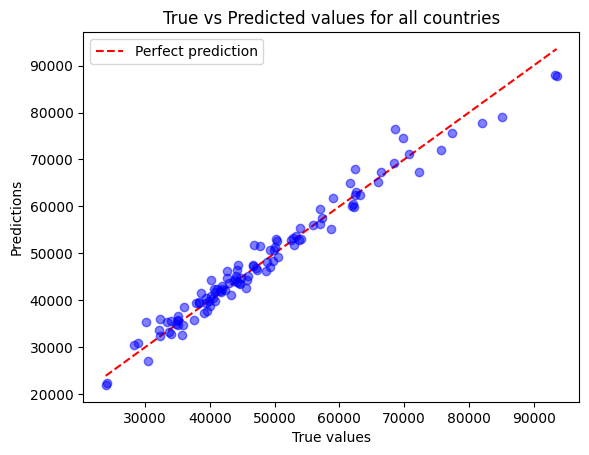

In [66]:
# plot predictions
y_pred = model.predict(X_test) * (y_std + EPS) + y_mean
y_test_scaled = y_test * (y_std + EPS) + y_mean


plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--', label='Perfect prediction')
plt.plot(y_test_scaled, y_pred, color='blue', marker='o', linestyle='None', alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted values for all countries')
plt.show()

In [67]:
import shap

PLOT_SHAP = False

if PLOT_SHAP:
    explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train, 20))
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
